In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

framesize = 1024

In [2]:
a = np.fromfile('symbols_before_eclipse.f32', dtype = 'float32')[1000:20000] # 2020-03-25 before eclipse
b = np.fromfile('symbols_after_eclipse.f32', dtype = 'float32')[305000:] # 2020-03-25 after eclipse
c = np.fromfile('symbols_20200329.f32', dtype = 'float32')[2000:90000] # 2020-03-29 before eclipse

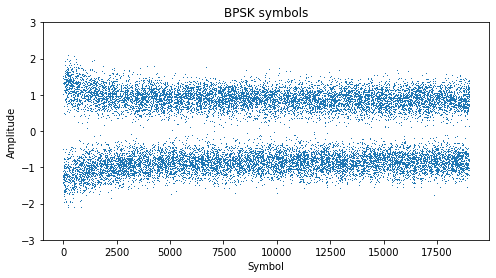

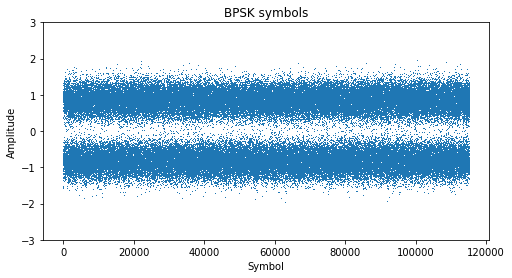

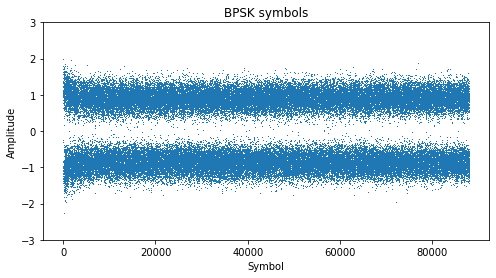

In [3]:
for x in [a, b, c]:
    plt.figure(figsize = (8,4), facecolor = 'w')
    plt.plot(x, ',')
    plt.ylim((-3,3))
    plt.title('BPSK symbols')
    plt.xlabel('Symbol')
    plt.ylabel('Amplitude');

In [4]:
a_diff = np.sign(-a[1:]*a[:-1])
b_diff = np.sign(-b[1:]*b[:-1])
c_diff = np.sign(-c[1:]*c[:-1])
corr = np.fft.ifft(np.fft.fft(a_diff[:framesize])*np.conj(np.fft.fft(b_diff[:framesize])))
corr2 = np.fft.ifft(np.fft.fft(a_diff[:framesize])*np.conj(np.fft.fft(c_diff[:framesize])))

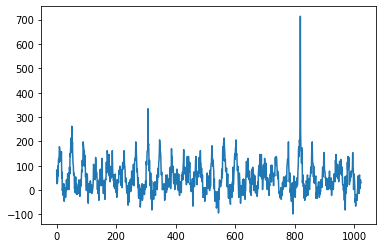

In [5]:
plt.plot(corr.real)

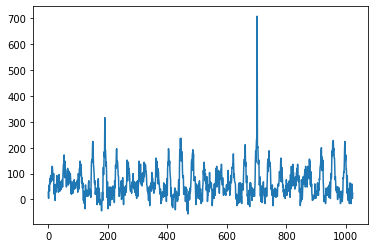

In [6]:
plt.plot(corr2.real)

In [7]:
shift = np.argmax(corr.real)
shift

819

In [8]:
shift2 = np.argmax(corr2.real)
shift2

702

In [9]:
x = np.concatenate((a_diff, np.zeros(1024*3 + 1 + shift - a.size % 1024), b_diff))
x = np.concatenate((x, np.zeros(1024*10 + shift2 - x.size % 1024), c_diff))

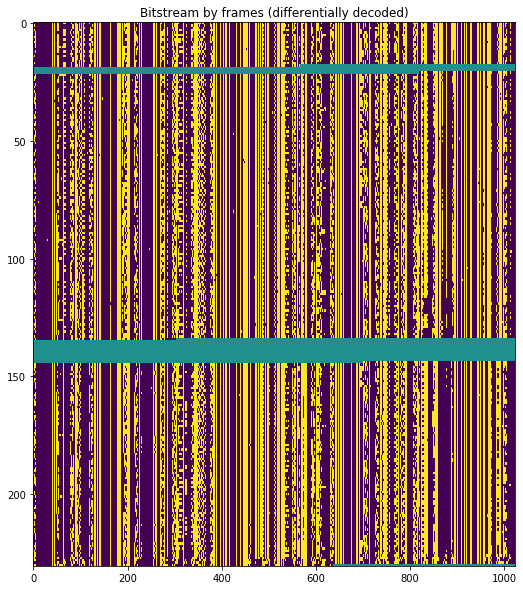

In [10]:
pad_diff = 0
x_pad_diff = np.concatenate((np.zeros(pad_diff), x))#np.sign(-x[1:]*x[:-1])))
x_pad_diff = np.concatenate((x_pad_diff, np.zeros(framesize - x_pad_diff.size % framesize)))
data = x_pad_diff.reshape((-1,framesize))
plt.figure(figsize = (14,10), facecolor = 'w')
plt.imshow(data, aspect = 5)
plt.title('Bitstream by frames (differentially decoded)');

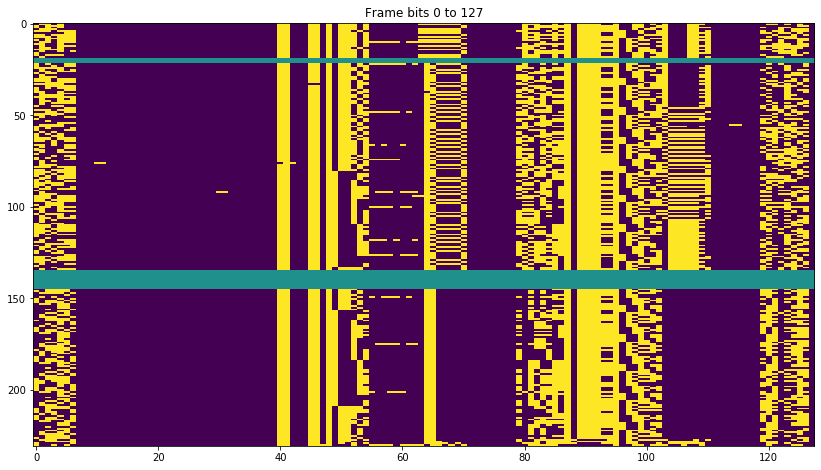

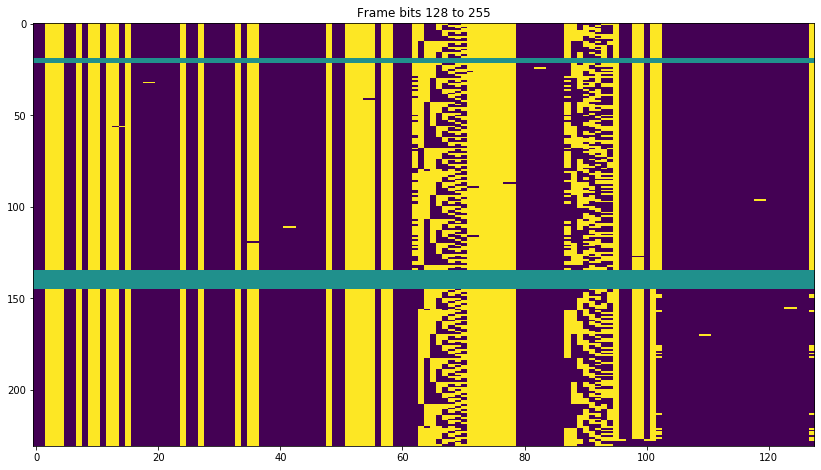

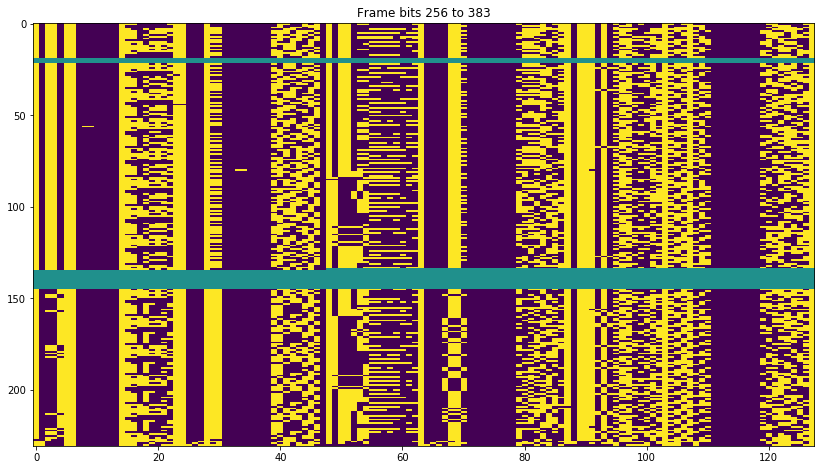

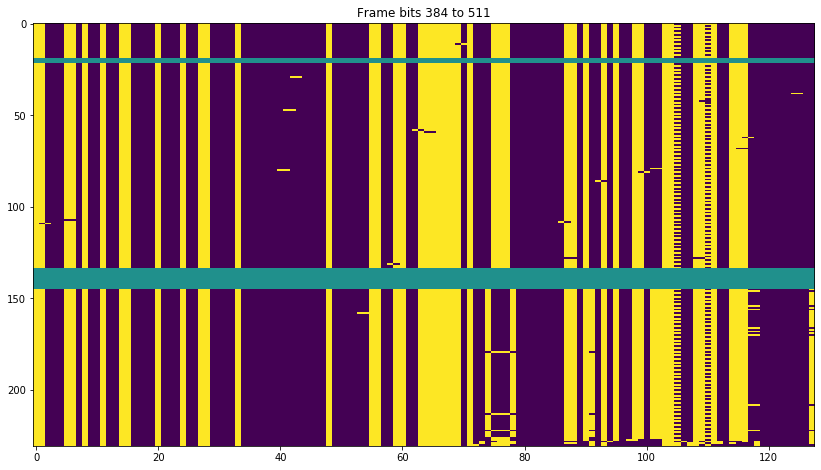

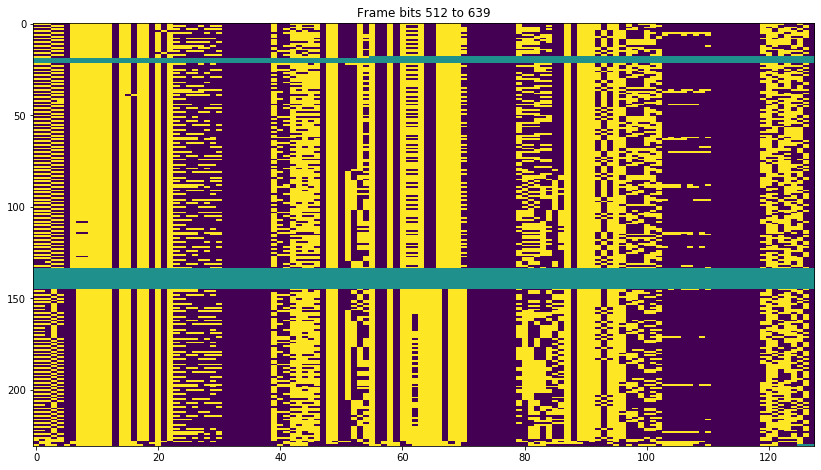

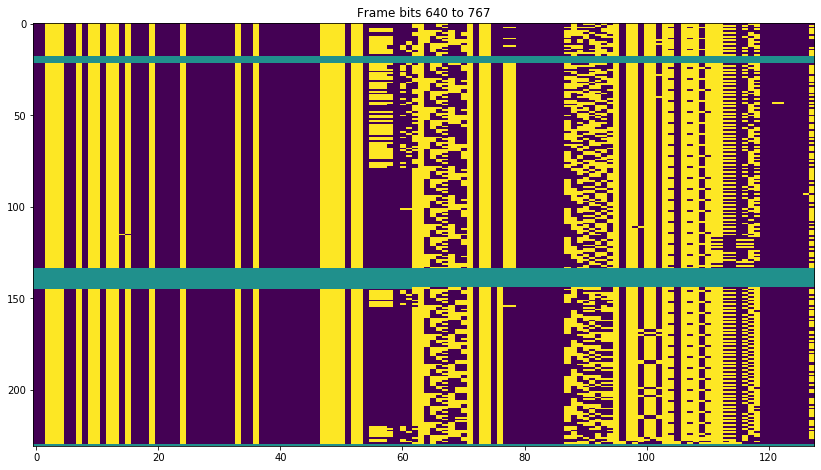

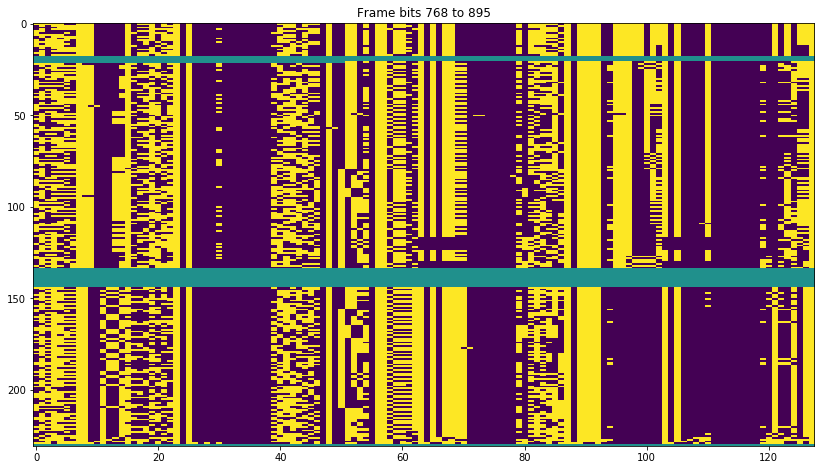

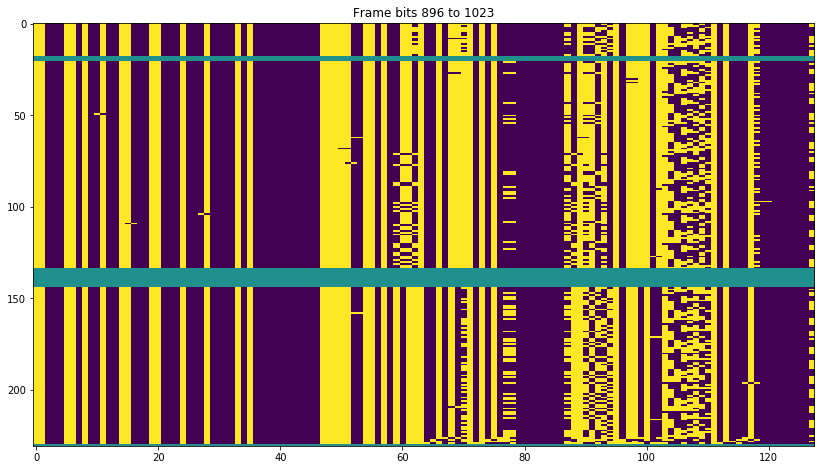

In [11]:
for off in range(0,1024,128):
    plt.figure(figsize = (14,10), facecolor = 'w')
    plt.imshow(data[:,off:off+128], aspect = 0.3)
    plt.title(f'Frame bits {off} to {off+128-1}')

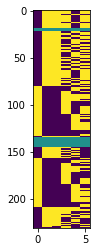

In [12]:
plt.imshow(data[:,49:55], aspect = 0.1)

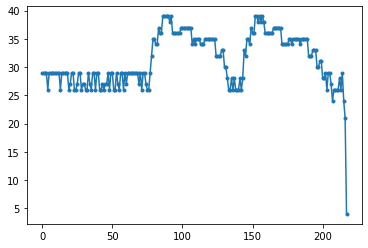

In [13]:
bits = data[:,49:55]
bits = ((bits[np.all(bits != 0, axis = 1)] + 1)/2).astype('int')
plt.plot([np.packbits(b)[0] >> 2 for b in bits], '.-')

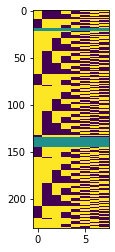

In [14]:
plt.imshow(data[:,191:199], aspect = 0.1)

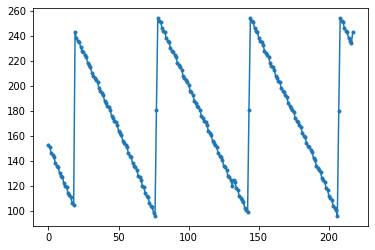

In [15]:
bits = data[:,191:199]
bits = ((bits[np.all(bits != 0, axis = 1)] + 1)/2).astype('int')
plt.plot([np.packbits(b).view('uint8') for b in bits], '.-')

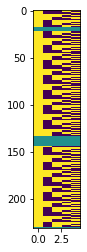

In [16]:
plt.imshow(data[:,703:708], aspect = 0.1)

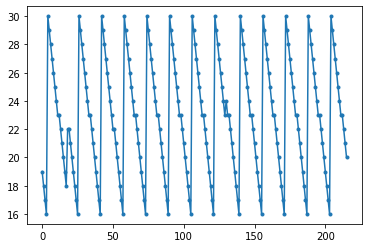

In [17]:
bits = data[:, 703:708]
bits = ((bits[np.all(bits != 0, axis = 1)] + 1)/2).astype('int')
plt.plot([np.packbits(b).view('uint8') >> 3 for b in bits], '.-')

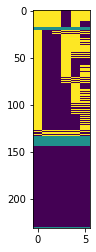

In [18]:
plt.imshow(data[:,865:871], aspect = 0.1)

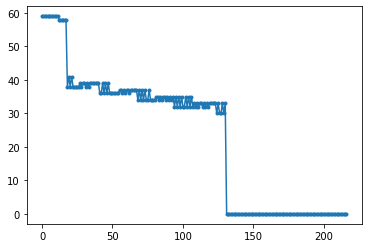

In [19]:
bits = data[:, 865:871]
bits = ((bits[np.all(bits != 0, axis = 1)] + 1)/2).astype('int')
plt.plot([np.packbits(b).view('uint8')>>2 for b in bits], '.-')